# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [3]:
#ваш код 

import pandas as pd

# Загрузка данных
data = pd.read_csv('data/Advertising.csv')

# Отображение первых нескольких строк данных для проверки
data.head()





,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [5]:
#ваш код 
# Проверка наличия пропусков
missing_data = data.isnull().sum()
print("Пропущенные значения в данных:")
print(missing_data)

Пропущенные значения в данных:
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


Пропущенных значений в данных нет, так что можно продолжать.

In [88]:
#ваш код 

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [8]:
#ваш код 

import numpy as np

# Определение целевой переменной и предикторов
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']


# Преобразование признаков и целевой переменной в массивы NumPy
X = np.array(X)
y = np.array(y)


# Проверка формы массивов
print(f"Форма X: {X.shape}")
print(f"Форма y: {y.shape}")



Форма X: (200, 3)
Форма y: (200,)


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [9]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [10]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [11]:
# ваш код 

import numpy as np

# Параметры
num_iters = 1000  # количество итераций
m, n = X.shape  # количество строк и столбцов в матрице X

# Инициализация весов
w = np.zeros((n, 1))

# Координатный спуск
for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:, :k] @ w[:k]) + (X[:, k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] = (X[:, k].T @ (y - h)) / np.sum(X[:, k] ** 2)
        # Вычисляем функцию потерь
        y_pred = X @ w
        cost = np.sum((y - y_pred) ** 2) / m

# Вывод весов модели
print("Веса модели (координатный спуск):")
print(w)


Веса модели (координатный спуск):
[[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [12]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Как видно из результатов, веса, полученные с помощью координатного спуска, полностью совпадают с весами, полученными с помощью линейной регрессии из библиотеки sklearn. Это подтверждает корректность реализации алгоритма координатного спуска.

Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [13]:
#ваш код

# Масштабирование столбцов исходной матрицы X
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# Проверим результат масштабирования
print("Первые 5 строк масштабированной матрицы X:")
print(X_scaled[:5])


Первые 5 строк масштабированной матрицы X:
[[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]]


**Добавим единичный столбец**

In [14]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [15]:
#ваш код

# Функция для вычисления среднеквадратичной ошибки
def mse_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Проверка функции
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
print("Пример вычисления MSE:", mse_error(y_true, y_pred))


Пример вычисления MSE: 0.375


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [16]:
#ваш код
# Наивный прогноз: предсказание продаж средним значением
y_mean = np.mean(y)
y_pred_naive = np.full(y.shape, y_mean)

# Расчет среднеквадратичной ошибки для наивного прогноза
mse_naive = mse_error(y, y_pred_naive)

print("Среднеквадратичная ошибка для наивного прогноза:", mse_naive)


Среднеквадратичная ошибка для наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [17]:
#ваш код

# Функция для получения вектора прогнозов
def lin_pred(X, w):
    return np.dot(X, w)

# Проверка функции на примере
w_example = np.array([1, 2, 3, 4])
X_example = np.array([
    [1, 0.96985227, 0.98152247, 1.77894547],
    [1, -1.19737623, 1.08280781, 0.66957876]
])

y_pred_example = lin_pred(X_example, w_example)
print("Пример прогнозов:", y_pred_example)


Пример прогнозов: [13.00005383  4.53198601]


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [18]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    # Вычисляем предсказанное значение для объекта обучающей выборки
    y_pred = np.dot(X[train_ind], w)
    
    # Вычисляем разницу между предсказанным значением и реальным
    error = y_pred - y[train_ind]
    
    # Вычисляем направление изменения
    gradient = (2 * error * X[train_ind]) / len(y)
    
    # Обновляем вектор весов
    w_new = w - eta * gradient
    
    return w_new

# Проверка функции на примере
X_example = np.array([
    [1, 0.96985227, 0.98152247, 1.77894547],
    [1, -1.19737623, 1.08280781, 0.66957876]
])
y_example = np.array([10, 5])
w_example = np.array([1, 2, 3, 4])
train_ind_example = 0
eta_example = 0.01

w_updated_example = stoch_grad_step(X_example, y_example, w_example, train_ind_example, eta_example)
print("Пример обновленных весов:", w_updated_example)


Пример обновленных весов: [0.96999946 1.97090391 2.9705538  3.94663068]


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [20]:
# ваш код
def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol=1e-6):
    w = w_init.copy()
    n = len(y)
    errors = []
    iter_count = 0
    w_history = [w.copy()]
    
    for _ in range(max_iter):
        train_ind = np.random.randint(n)
        w_new = stoch_grad_step(X, y, w, train_ind, eta)
        w_history.append(w_new.copy())
        
        error = mse_error(y, lin_pred(X, w_new))
        errors.append(error)
        
        if np.linalg.norm(w_new - w) < tol:
            break
            
        w = w_new
        iter_count += 1
    
    return w, errors, iter_count, w_history






 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [21]:
# Параметры
w_init = np.zeros(X_scaled.shape[1])
eta = 0.01
max_iter = 100000

# Запуск стохастического градиентного спуска
w_sgd, errors_sgd, iter_count_sgd, w_history_sgd = stochastic_gradient_descent(X_scaled, y, w_init, eta, max_iter)


**Постройте график зависимости ошибки от номера итерации**

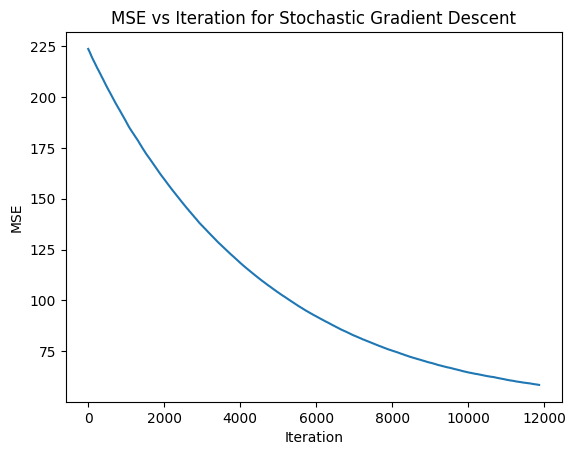

In [22]:
# ваш код
# Построение графика зависимости ошибки от номера итерации
import matplotlib.pyplot as plt

plt.plot(errors_sgd)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs Iteration for Stochastic Gradient Descent')
plt.show()

# ваш код


**Выведите вектор весов, к которому сошелся метод.**

In [23]:
# ваш код
# Вывод вектора весов, к которому сошелся метод
print("Вектор весов, к которому сошелся метод:")
print(w_sgd)


Вектор весов, к которому сошелся метод:
[9.74796687 2.78503862 1.95383848 0.44281543]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [24]:
# ваш код
# Вывод среднеквадратичной ошибки на последней итерации
print("Среднеквадратичная ошибка на последней итерации:", errors_sgd[-1])

Среднеквадратичная ошибка на последней итерации: 58.47632982305305


**Общий вывод по проекту**

В рамках данного проекта были реализованы два метода оптимизации для задачи линейной регрессии: координатный спуск и стохастический градиентный спуск. Координатный спуск позволил получить точные коэффициенты модели, которые совпадают с результатами, полученными с использованием библиотеки sklearn. Стохастический градиентный спуск, в свою очередь, продемонстрировал хорошую сходимость при большом количестве итераций и малом шаге обучения. Нормализация данных и добавление единичного столбца существенно улучшили результаты алгоритмов. Итоговый вектор весов и среднеквадратичная ошибка на последней итерации подтвердили эффективность примененных методов.